In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split

In [24]:
#Read csv data
psyco = pd.read_csv("psyco1.csv")
psyco1 = psyco.copy()
psyco2 = psyco.copy()

In [25]:
psyco1['gender'] = LabelEncoder().fit_transform(psyco1['gender'])
psyco1['age'] = LabelEncoder().fit_transform(psyco1['age'])
psyco1['occupation'] = LabelEncoder().fit_transform(psyco1['occupation'])
psyco1['line_of_work'] = LabelEncoder().fit_transform(psyco1['line_of_work'])
psyco1['prefer'] = LabelEncoder().fit_transform(psyco1['prefer'])
psyco1['certaindays_hw'] = LabelEncoder().fit_transform(psyco1['certaindays_hw'])

In [26]:
psyco2['gender'] = LabelEncoder().fit_transform(psyco2['gender'])
psyco2['age'] = LabelEncoder().fit_transform(psyco2['age'])
psyco2['occupation'] = LabelEncoder().fit_transform(psyco2['occupation'])
psyco2['line_of_work'] = LabelEncoder().fit_transform(psyco2['line_of_work'])
psyco2['prefer'] = LabelEncoder().fit_transform(psyco2['prefer'])
psyco2['certaindays_hw'] = LabelEncoder().fit_transform(psyco2['certaindays_hw'])

In [27]:
psyco1.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,1,1,5,7,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,0,2
1,0,1,6,7,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,0,1
2,1,1,5,7,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,0,2
3,1,1,5,7,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,0,2
4,1,0,5,7,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,0,2


In [28]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(psyco1.values)
scaled_features_psyco = pd.DataFrame(scaled_features, index=psyco1.index, columns=psyco1.columns)
scaled_features_psyco.describe()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
count,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03
mean,-9.675476e-17,-4.837738e-17,-1.148963e-16,9.675476e-17,-3.023586e-18,1.209434e-17,-7.558965e-17,9.675476e-17,1.814152e-17,9.070758e-18,-3.023586e-18,-2.872407e-17,4.837738e-17,-2.418869e-17,3.930662e-17,9.070758e-17,-4.837738e-17,1.814152e-17,-1.088491e-16
std,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00
min,-1.520578e+00,-1.111503e+00,-2.177181e+00,-4.378047e+00,-1.703799e+00,-1.495519e+00,-7.400447e-01,-1.210365e+00,-1.418586e+00,-1.641023e+00,-1.434999e+00,-1.782386e+00,-1.835929e+00,-1.653567e+00,-2.001055e+00,-1.568701e+00,-1.294683e+00,-6.367907e-01,-1.486731e+00
25%,-9.248197e-01,-1.111503e+00,-8.450227e-01,3.161827e-01,-1.204929e+00,-1.118996e+00,-7.400447e-01,-1.210365e+00,-6.090480e-01,-8.277790e-01,-6.297825e-01,-1.005279e+00,-3.793344e-01,-8.553167e-01,-1.077189e+00,-1.357072e+00,-1.095521e+00,-6.367907e-01,-1.486731e+00
50%,-3.290614e-01,8.524305e-01,4.308255e-02,3.161827e-01,-2.071901e-01,3.870983e-01,-7.400447e-01,-4.211426e-01,2.004898e-01,-1.453458e-02,1.754345e-01,5.489351e-01,3.489628e-01,-5.706640e-02,-1.533225e-01,5.689572e-01,6.949391e-01,-6.367907e-01,-2.777975e-01
75%,8.624552e-01,8.524305e-01,9.311878e-01,3.161827e-01,7.905491e-01,3.870983e-01,6.624593e-01,1.157303e+00,1.010028e+00,7.987098e-01,9.806515e-01,5.489351e-01,1.077260e+00,7.411839e-01,7.705436e-01,7.805853e-01,8.960921e-01,1.570375e+00,9.311360e-01
max,2.053972e+00,2.816364e+00,9.311878e-01,9.867870e-01,2.287158e+00,1.516669e+00,2.766215e+00,1.946525e+00,1.819565e+00,1.611954e+00,1.785868e+00,1.326042e+00,1.077260e+00,1.539434e+00,1.694410e+00,8.040995e-01,9.160082e-01,1.570375e+00,9.311360e-01


In [29]:
scaled_features_psyco.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,-0.924820,0.852431,0.043083,0.316183,-0.20719,-1.118996,-0.740045,0.368080,0.200490,-0.014535,0.175435,0.548935,1.077260,-0.855317,-1.077189,-1.357072,-1.294683,-0.636791,0.931136
1,-1.520578,0.852431,0.487135,0.316183,-0.20719,1.140145,-0.740045,1.157303,-0.609048,-0.827779,0.980651,-1.782386,1.077260,1.539434,1.694410,0.804100,0.914017,-0.636791,-0.277797
2,-0.924820,0.852431,0.043083,0.316183,-0.20719,-0.365949,0.662459,-0.421143,-0.609048,1.611954,0.175435,0.548935,0.348963,0.741184,0.770544,0.780585,-1.075605,-0.636791,0.931136
3,-0.924820,0.852431,0.043083,0.316183,-0.20719,-0.365949,0.662459,0.368080,-1.418586,-0.014535,1.785868,0.548935,-0.379334,-1.653567,-1.077189,-1.357072,0.916008,-0.636791,0.931136
4,-0.924820,-1.111503,0.043083,0.316183,-0.20719,-0.365949,0.662459,-0.421143,-0.609048,-0.014535,0.175435,-0.228172,-0.379334,0.741184,-0.153322,0.588196,0.694939,-0.636791,0.931136


In [30]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\nadon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

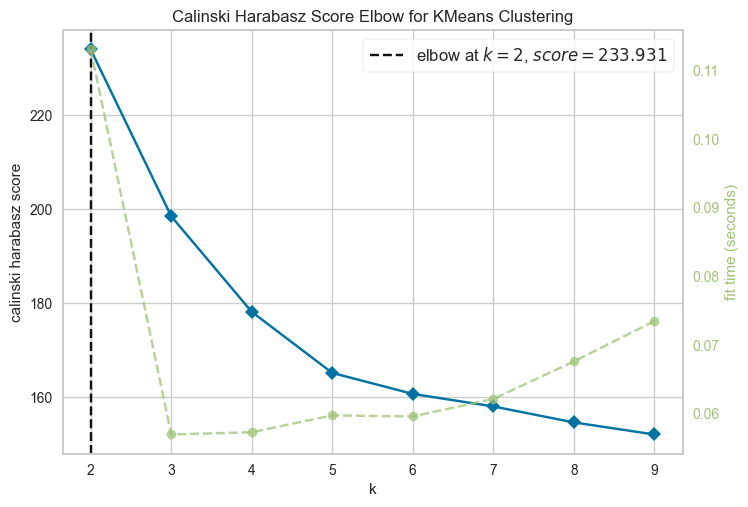

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [31]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(scaled_features_psyco)        # Fit the data to the visualizer
visualizer.show()

In [32]:
optimal_k = 3  # Replace with the chosen k value
kmeans = KMeans(n_clusters=optimal_k, random_state=12)
psyco1['Cluster'] = kmeans.fit_predict(scaled_features_psyco)

C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
psyco1.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Cluster
0,1,1,5,7,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,0,2,0
1,0,1,6,7,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,0,1,0
2,1,1,5,7,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,0,2,1
3,1,1,5,7,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,0,2,0
4,1,0,5,7,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,0,2,0


In [34]:
cluster_stats = psyco1.groupby('Cluster').agg(['mean']).T

In [35]:
cluster_stats

,Cluster,0,1,2
age,mean,1.399113,2.922693,3.702786
gender,mean,0.895787,0.456359,0.241486
occupation,mean,5.609756,5.007481,3.786378
line_of_work,mean,5.926829,6.845387,6.975232
time_bp,mean,7.345898,7.354115,7.588235
time_dp,mean,7.046563,7.635910,9.681115
travel_time,mean,0.875831,1.229426,0.989164
easeof_online,mean,2.804878,1.995012,2.823529
home_env,mean,3.146341,2.184539,2.907121
prod_inc,mean,-0.126386,0.276808,-0.134675


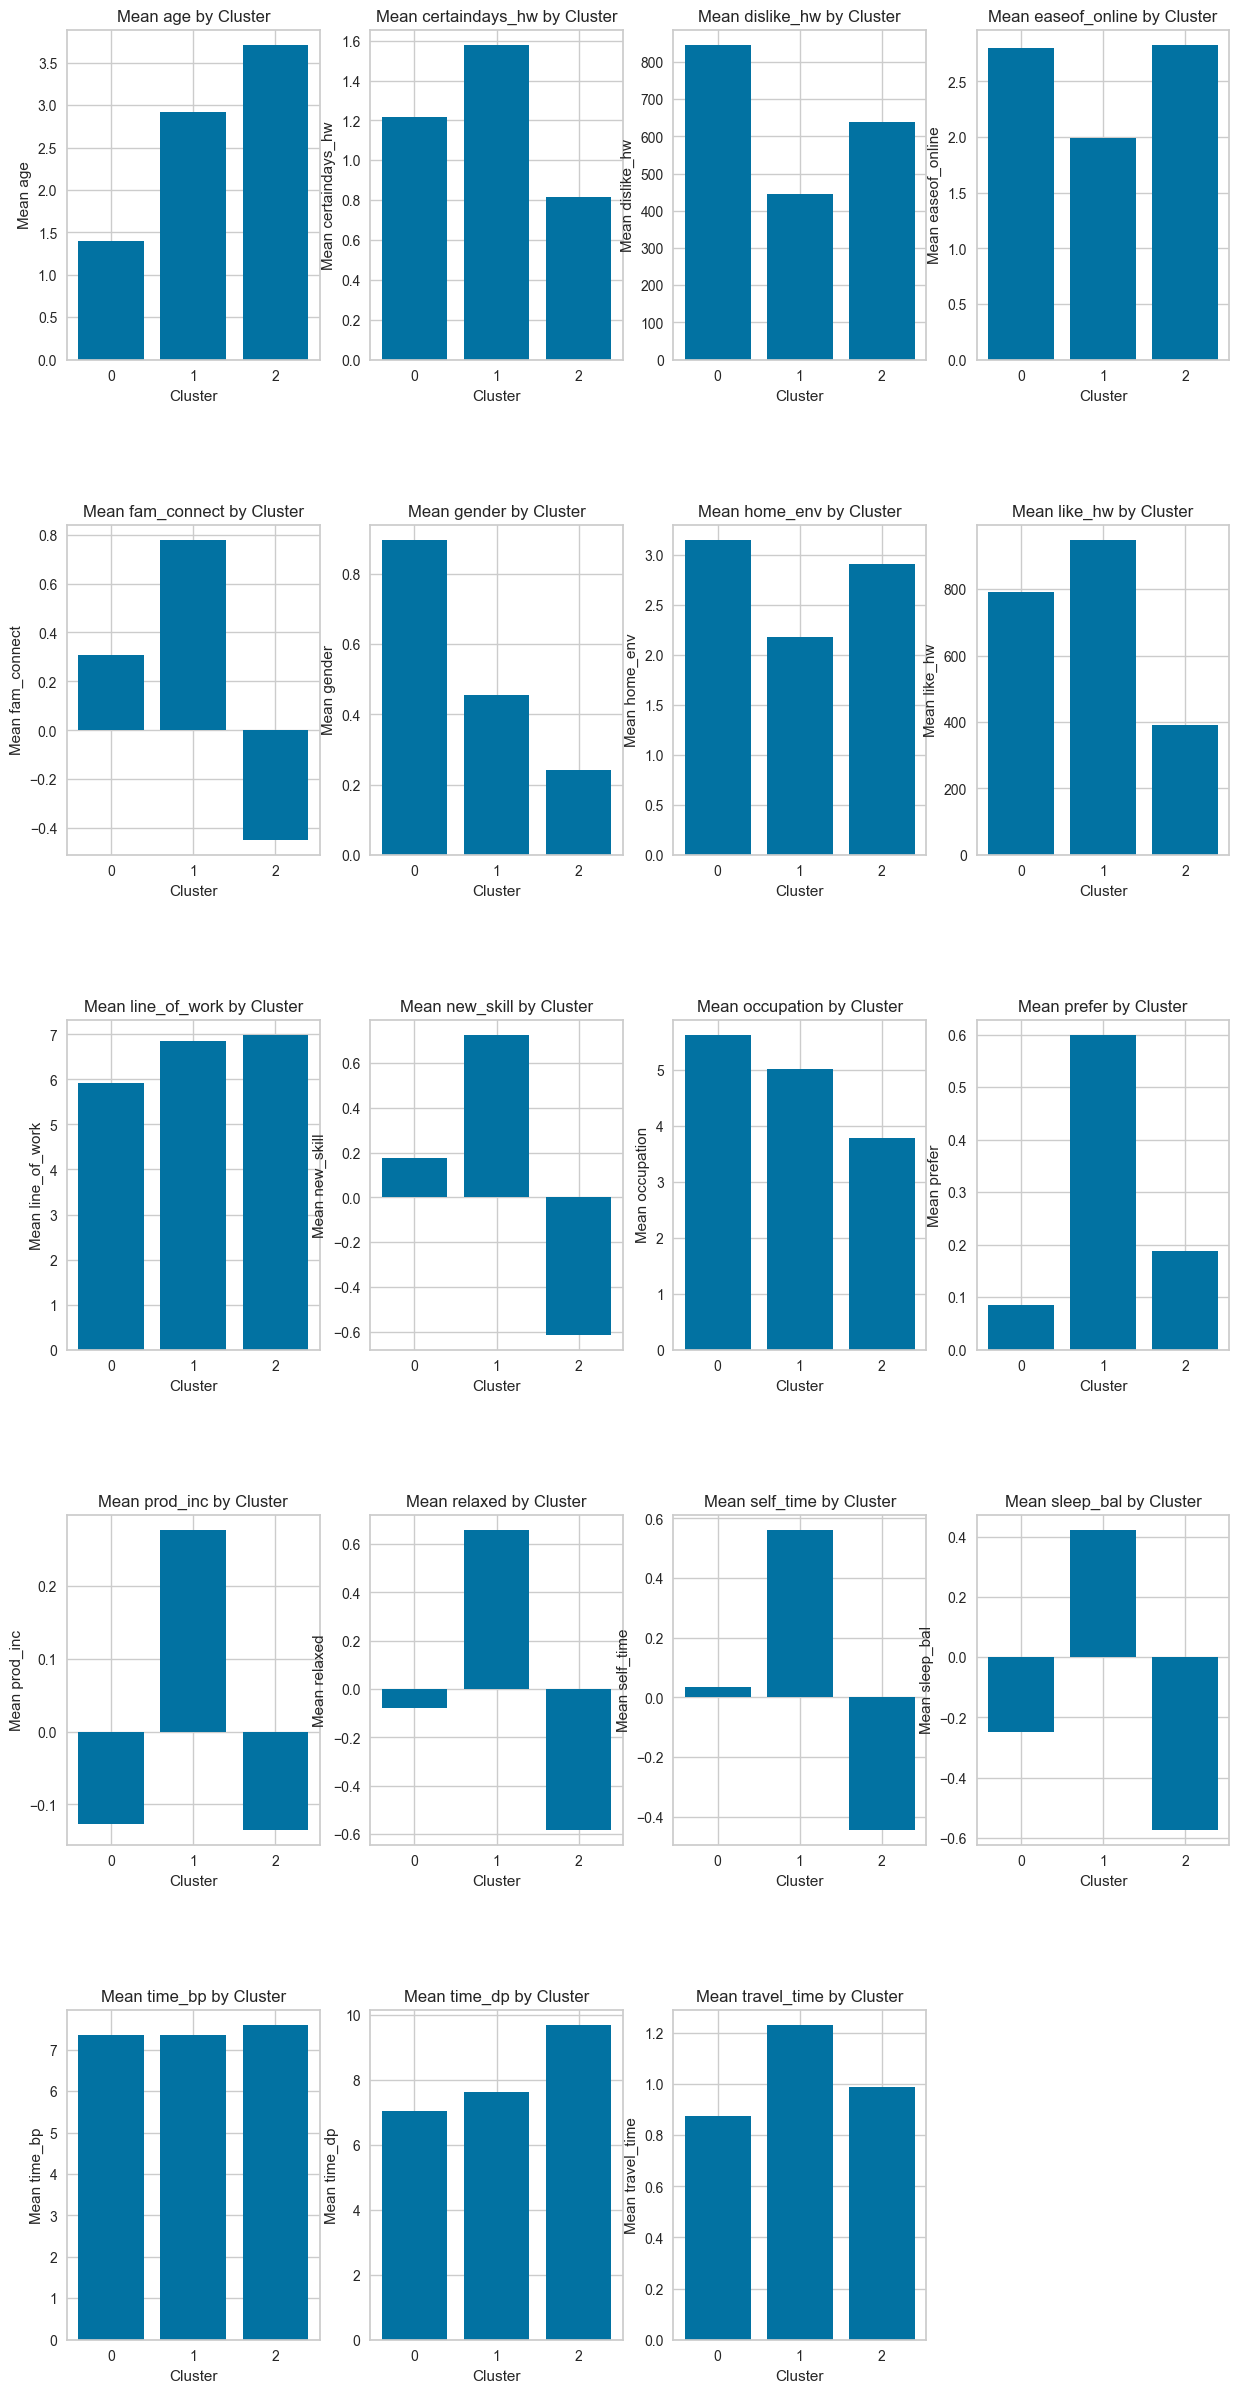

In [36]:
cluster_means = psyco1.groupby('Cluster').mean()

# Get the list of cluster labels
cluster_labels = cluster_means.index

# Get the list of columns you want to plot (excluding the 'Cluster' column)
columns_to_plot = psyco1.columns.difference(['Cluster'])

# Create subplots for each column and stack them in groups of four
num_columns = len(columns_to_plot)
rows = (num_columns + 3) // 4  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, 4, figsize=(15, 6 * rows))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_to_plot):
    row = i // 4
    col = i % 4
    axes[row, col].bar(cluster_labels, cluster_means[column])
    axes[row, col].set_xlabel('Cluster')
    axes[row, col].set_ylabel('Mean ' + column)
    axes[row, col].set_title('Mean ' + column + ' by Cluster')

# Hide empty subplots if the number of columns is not a multiple of 4
for i in range(num_columns, rows * 4):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [37]:
#psyco1_sample, _ = train_test_split(psyco1, test_size=1 - 0.01, random_state=12)

In [38]:
#scaled_data = scaler.fit_transform(psyco1_sample)

# Calculate the linkage matrix
linkage_matrix = linkage(scaled_features_psyco, method='ward')


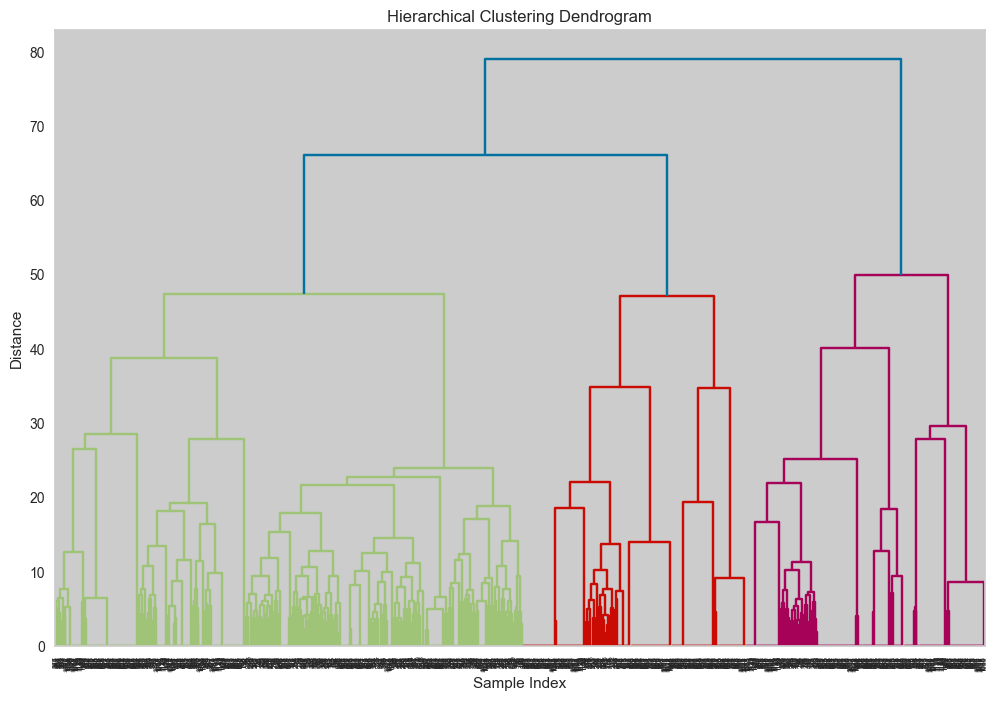

In [39]:
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=scaled_features_psyco.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [40]:
hcluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
psyco2['Cluster'] = hcluster.fit_predict(scaled_features_psyco)

In [41]:
psyco2.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Cluster
0,1,1,5,7,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,0,2,1
1,0,1,6,7,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,0,1,1
2,1,1,5,7,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,0,2,2
3,1,1,5,7,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,0,2,1
4,1,0,5,7,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,0,2,1


In [42]:
psyco2['Cluster'].value_counts()

1    591
0    303
2    281
Name: Cluster, dtype: int64

In [43]:
cluster_stats1 = psyco2.groupby('Cluster').agg(['mean']).T
cluster_stats1

,Cluster,0,1,2
age,mean,3.699670,1.697124,3.113879
gender,mean,0.198020,0.878173,0.306050
occupation,mean,3.653465,5.741117,4.487544
line_of_work,mean,7.181518,5.746193,7.469751
time_bp,mean,7.415842,7.450085,7.341637
time_dp,mean,9.610561,7.362098,7.487544
travel_time,mean,0.963696,0.957699,1.243772
easeof_online,mean,2.848185,2.593909,2.067616
home_env,mean,2.910891,2.871404,2.330961
prod_inc,mean,-0.133663,-0.027073,0.238434


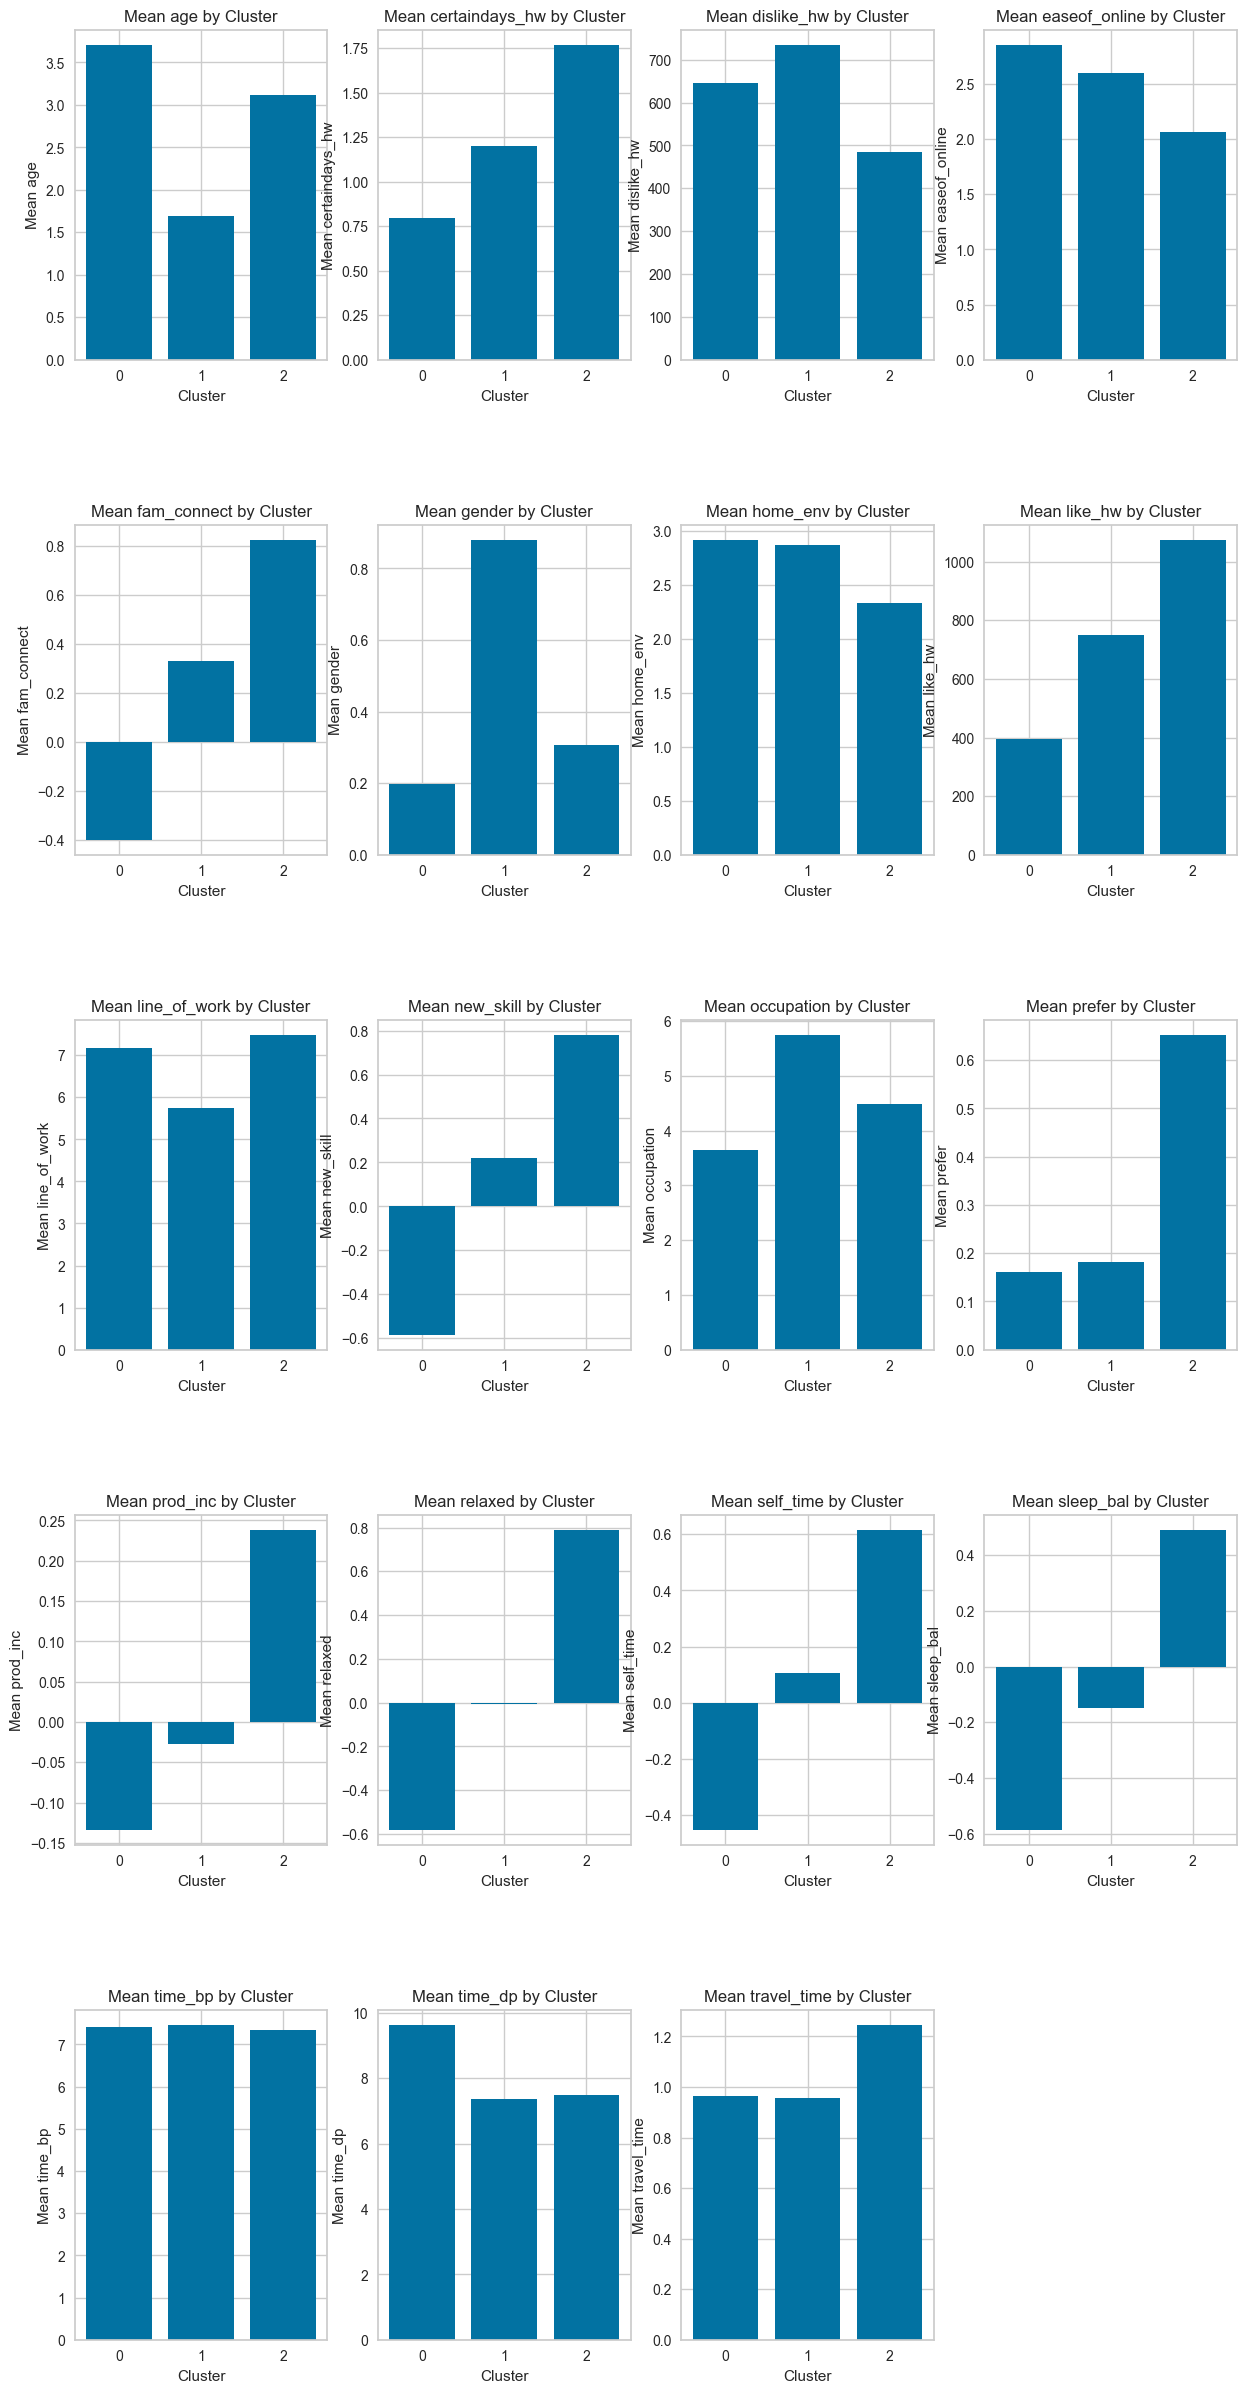

In [44]:
cluster_means = psyco2.groupby('Cluster').mean()

# Get the list of cluster labels
cluster_labels = cluster_means.index

# Get the list of columns you want to plot (excluding the 'Cluster' column)
columns_to_plot = psyco2.columns.difference(['Cluster'])

# Create subplots for each column and stack them in groups of four
num_columns = len(columns_to_plot)
rows = (num_columns + 3) // 4  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, 4, figsize=(15, 6 * rows))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_to_plot):
    row = i // 4
    col = i % 4
    axes[row, col].bar(cluster_labels, cluster_means[column])
    axes[row, col].set_xlabel('Cluster')
    axes[row, col].set_ylabel('Mean ' + column)
    axes[row, col].set_title('Mean ' + column + ' by Cluster')

# Hide empty subplots if the number of columns is not a multiple of 4
for i in range(num_columns, rows * 4):
    fig.delaxes(axes.flatten()[i])

plt.show()


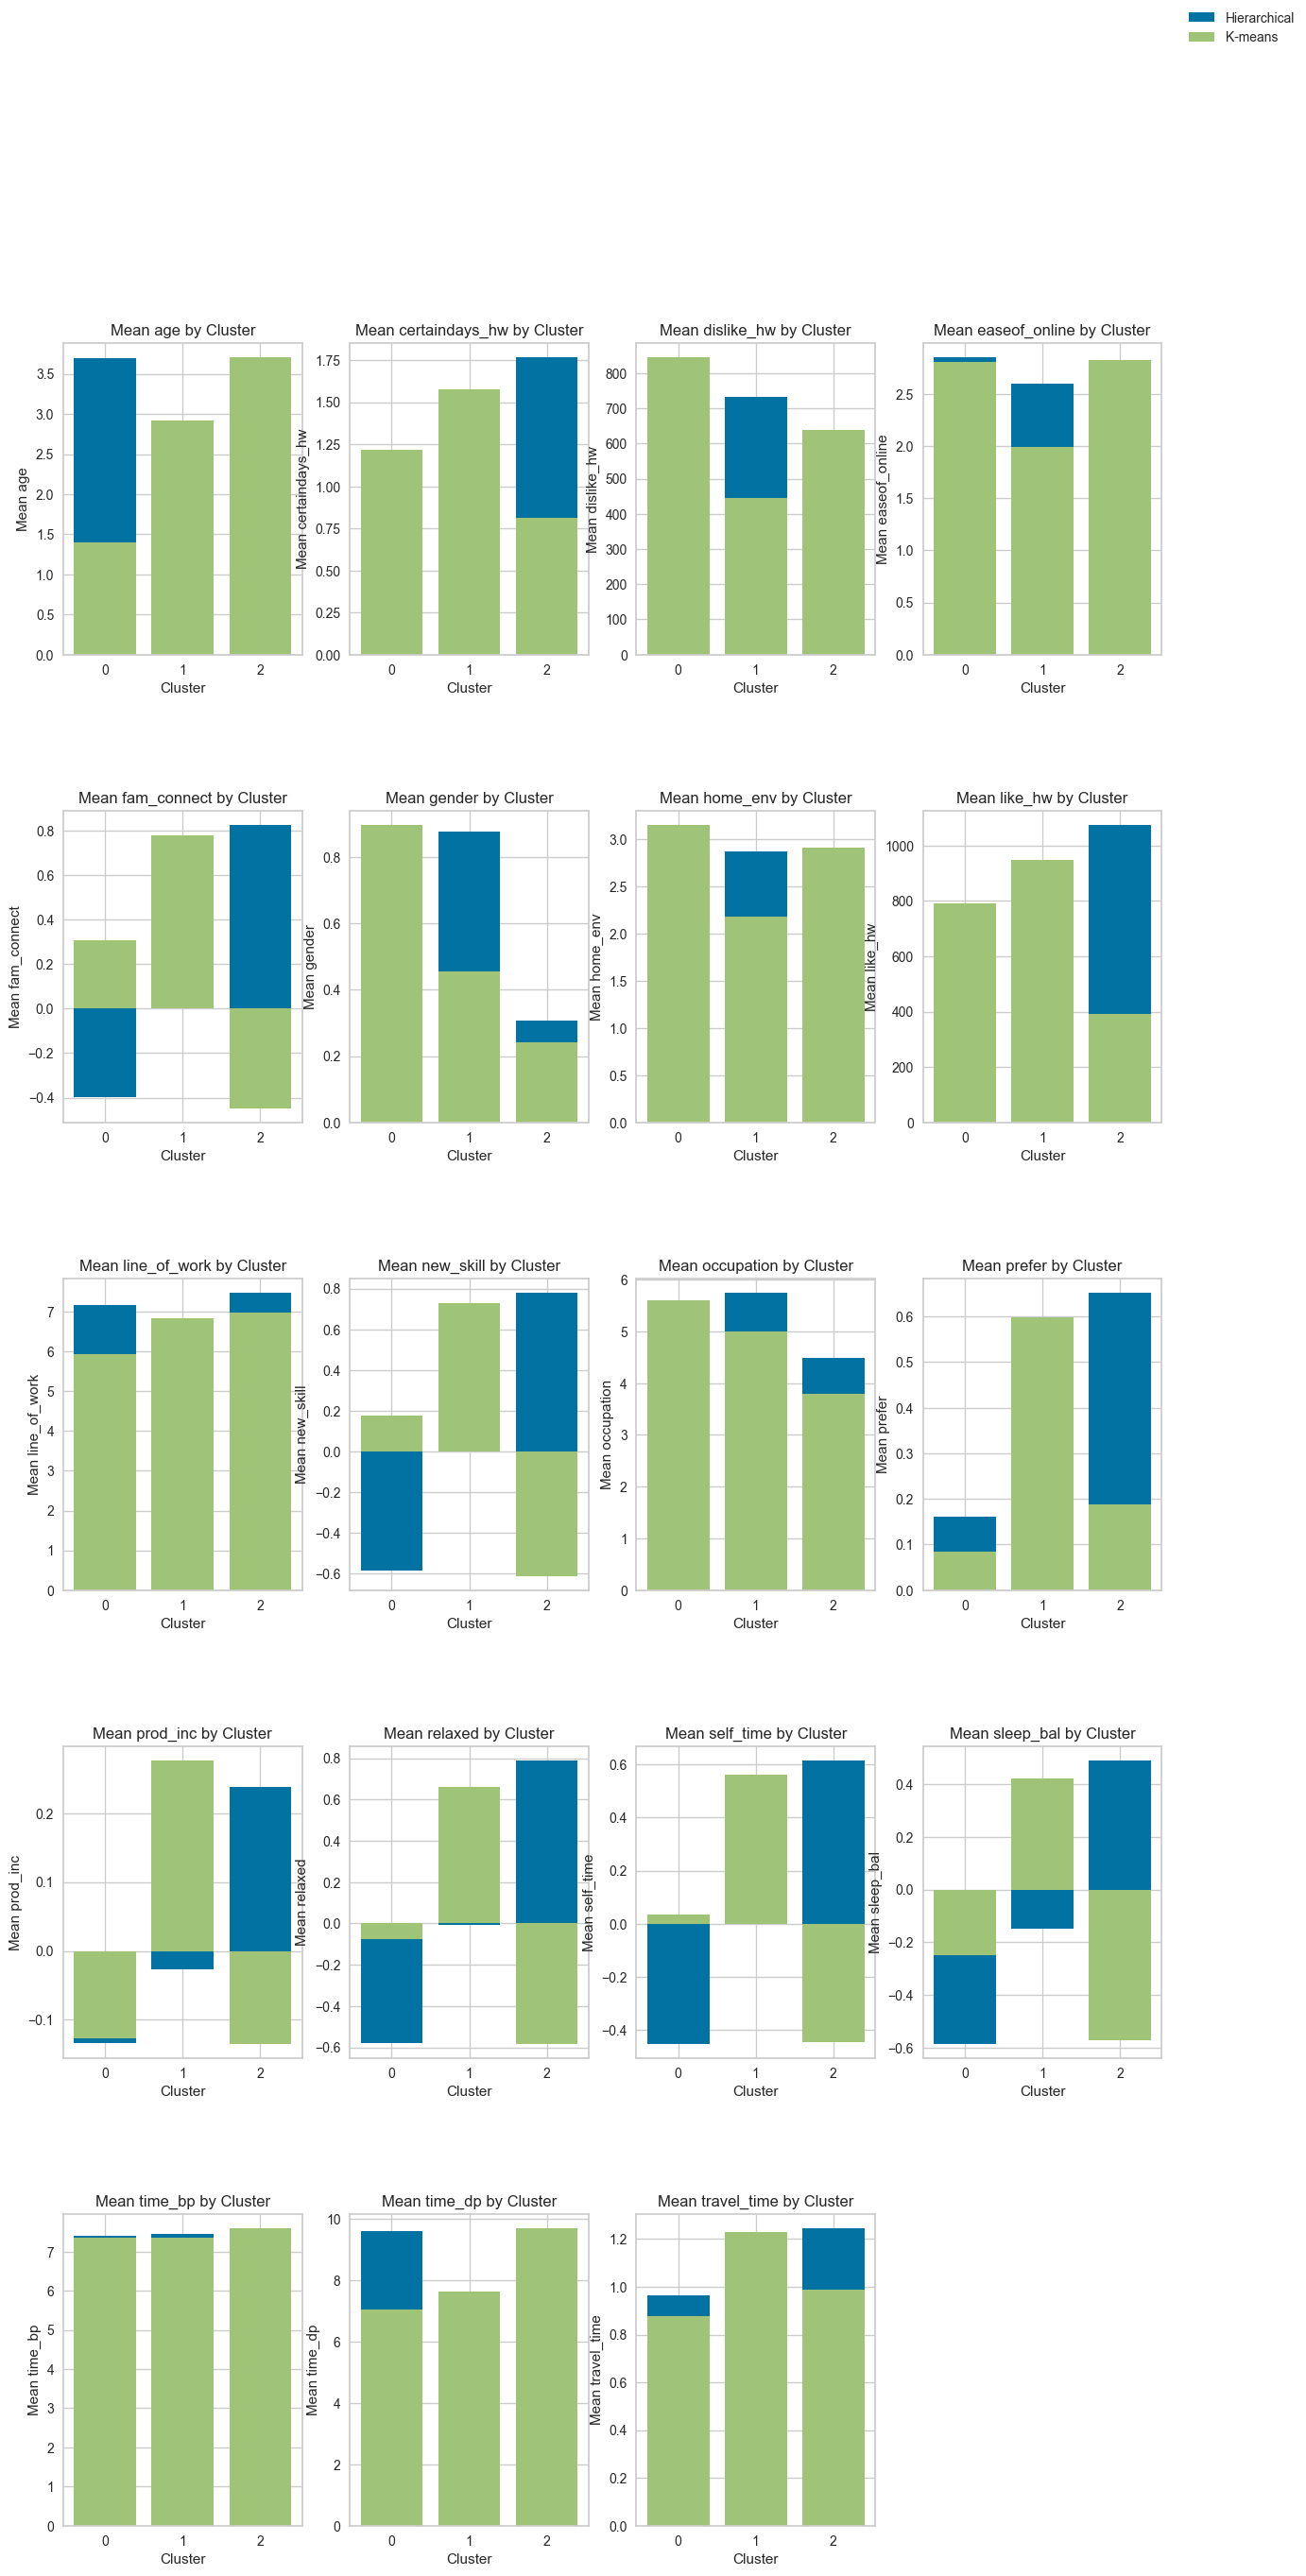

In [45]:
# Group the DataFrames by the 'Cluster' column and calculate the mean for each cluster
cluster_means_sample = psyco2.groupby('Cluster').mean()
cluster_means_psyco1 = psyco1.groupby('Cluster').mean()

# Get the list of cluster labels
cluster_labels_sample = cluster_means_sample.index
cluster_labels_psyco1 = cluster_means_psyco1.index

# Get the list of columns you want to plot (excluding the 'Cluster' column)
columns_to_plot_sample = psyco2.columns.difference(['Cluster'])
columns_to_plot_psyco1 = psyco1.columns.difference(['Cluster'])

# Create subplots for each column and stack them in groups of four
num_columns_sample = len(columns_to_plot_sample)
num_columns_psyco1 = len(columns_to_plot_psyco1)
rows_sample = (num_columns_sample + 3) // 4  # Calculate the number of rows needed for psyco1_sample
rows_psyco1 = (num_columns_psyco1 + 3) // 4  # Calculate the number of rows needed for psyco1

fig, axes = plt.subplots(max(rows_sample, rows_psyco1), 4, figsize=(15, 6 * max(rows_sample, rows_psyco1)))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_to_plot_sample):
    row = i // 4
    col = i % 4
    axes[row, col].bar(cluster_labels_sample, cluster_means_sample[column], label='psyco2')
    axes[row, col].set_xlabel('Cluster')
    axes[row, col].set_ylabel('Mean ' + column)
    axes[row, col].set_title('Mean ' + column + ' by Cluster')

for i, column in enumerate(columns_to_plot_psyco1):
    row = i // 4
    col = i % 4
    axes[row, col].bar(cluster_labels_psyco1, cluster_means_psyco1[column], label='psyco1')
    axes[row, col].set_xlabel('Cluster')
    axes[row, col].set_ylabel('Mean ' + column)
    axes[row, col].set_title('Mean ' + column + ' by Cluster')

# Hide empty subplots if the number of columns is not a multiple of 4
for i in range(max(num_columns_sample, num_columns_psyco1), max(rows_sample, rows_psyco1) * 4):
    fig.delaxes(axes.flatten()[i])

# Add a legend
fig.legend(['Hierarchical', 'K-means'])
plt.show()
